In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
plt.style.use("seaborn")
#loading the data 
df = pd.read_csv(r"EOD-AAPL.csv")

In [3]:
print(df.head())

         Date    Open     High      Low   Close      Volume  Dividend  Split  \
0  2017-12-28  171.00  171.850  170.480  171.08  16480187.0       0.0    1.0   
1  2017-12-27  170.10  170.780  169.710  170.60  21498213.0       0.0    1.0   
2  2017-12-26  170.80  171.470  169.679  170.57  33185536.0       0.0    1.0   
3  2017-12-22  174.68  175.424  174.500  175.01  16349444.0       0.0    1.0   
4  2017-12-21  174.17  176.020  174.100  175.01  20949896.0       0.0    1.0   

    Adj_Open   Adj_High    Adj_Low  Adj_Close   Adj_Volume  
0  41.208023  41.412858  41.082712  41.227302   65920748.0  
1  40.991139  41.155007  40.897156  41.111630   85992852.0  
2  41.159827  41.321285  40.889685  41.104401  132742144.0  
3  42.094839  42.274130  42.051462  42.174363   65397776.0  
4  41.971938  42.417756  41.955069  42.174363   83799584.0  


In [4]:
df.describe()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
count,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03
mean,194.564537,196.114735,193.016676,194.613130,3.605114e+07,0.015642,1.005505,26.413092,26.624142,26.197213,26.418748,1.931334e+08
std,160.562848,161.812898,159.407381,160.647536,2.194473e+07,0.175122,0.181735,6.625914,6.652340,6.590045,6.627883,1.112891e+08
min,90.000000,90.700000,89.470000,90.280000,5.704900e+06,0.000000,1.000000,14.214284,14.587125,14.190803,14.282823,4.590369e+07
25%,108.042500,108.942500,106.972500,108.007500,2.120714e+07,0.000000,1.000000,22.208527,22.472740,21.986746,22.239375,1.133450e+08
50%,121.585000,122.504950,120.640000,121.755000,3.248325e+07,0.000000,1.000000,25.826039,26.100845,25.555559,25.834367,1.681963e+08
75%,156.905000,157.809625,155.744975,156.515000,4.673778e+07,0.000000,1.000000,29.379756,29.593018,29.184278,29.413568,2.394642e+08
max,649.900000,651.260000,644.470000,647.350000,1.895606e+08,3.290000,7.000000,42.198462,42.702115,42.138216,42.514149,1.065523e+09


In [5]:
x = df[['High', 'Low','Open','Volume']].values
y = df['Close'].values

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [7]:
regressor =  LinearRegression()

In [8]:
regressor.fit(x_train,y_train)

LinearRegression()

In [9]:
print(regressor.coef_)

[ 8.34946657e-01  8.17070014e-01 -6.52350714e-01 -1.26040633e-09]


In [10]:
print(regressor.intercept_)

0.11715879234097315


In [11]:
predict = regressor.predict(x_test)

In [12]:
print(predict)

[120.02314433 132.0144722   99.46505327 114.64912414  99.65888229
 161.55235349 170.220755   129.59483305  97.67630918 113.91335341
 129.9991868  109.88216445 115.43496863 563.00440582 472.16909889
 126.11143523 160.57208029 115.53391352 104.2069998  153.64336158
 117.01168036 139.35857538  96.57958975 520.84890553  96.03946468
 116.66894248 126.72275145 113.96046127 113.79425457 495.85038809
 125.40114351 143.77802399 542.16315657 101.46719424 109.84761126
 126.83233511 174.2910376  116.26648488 115.43812741 111.33383593
 112.69469748 120.22770864 123.9322495   95.91995426 105.89698148
 101.20456006 493.51322552 115.38366085 107.37923632 116.35666938
 605.24356525 110.01232653 109.75145218  96.2500869   97.68935555
 504.11161867 101.16529272 128.28119804 158.89046689  95.94221016
 113.0698389  128.786234   170.13756302 101.62665398 100.47955293
  93.60873075  94.0877787  543.41148656  95.82945041 534.76003944
 155.41915005 112.10505786 108.20568721 112.4840142  123.34790963
 170.21163

In [13]:
dframe = pd.DataFrame({"Actual" : y_test.flatten() , 'Predicted' : predict.flatten()})

In [14]:
dframe.head(25)

,Actual,Predicted
0,120.53,120.023144
1,132.04,132.014472
2,98.75,99.465053
3,115.59,114.649124
4,99.44,99.658882
5,161.47,161.552353
6,170.15,170.220755
7,130.28,129.594833
8,97.90,97.676309
9,114.06,113.913353


In [15]:
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test,predict))
print("Mean Squared Error : ",metrics.mean_squared_error(y_test,predict))
print("Root Mean Squared Error : ",np.sqrt(metrics.mean_squared_error(y_test,predict)))

Mean Absolute Error :  0.6763554665060482
Mean Squared Error :  1.4493654214366212
Root Mean Squared Error :  1.2038959346374674


In [16]:
graph = dframe.head(20)

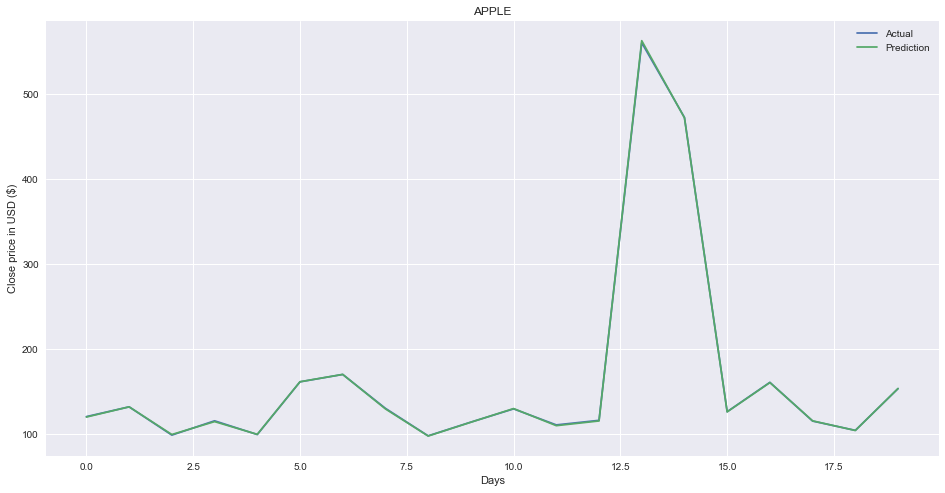

In [17]:
#visualising the dataset
plt.figure(figsize=(16,8))
plt.title("APPLE")
plt.xlabel('Days')
plt.ylabel('Close price in USD ($)')
plt.plot( graph)
plt.legend(['Actual','Prediction'])
plt.show()